In [2]:
import numpy as np
import matplotlib as mpl
%matplotlib inline

import matplotlib.pyplot as plt

def shift_latt(grid):
    
    if doBounce == True:
        saved_latt = np.ma.masked_where(mask is True, latt)
    
    # center (0,0)
    # stays constant
        
    # east (0,1)
    ch = 1
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=1, axis=1)
        
    # north (-1, 0)
    ch = 2
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=-1, axis=0)
        
    # west (0, -1)
    ch = 3
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=-1, axis=1)
        
    # south (1, 0)
    ch = 4
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=1, axis=0)
        
    # north-east(-1, 1)
    ch = 5
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=-1, axis=0), shift=1, axis=1)
        
    # north-west(-1, -1)
    ch = 6
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=-1, axis=0), shift=-1, axis=1)
        
    # south-west(1, -1)
    ch = 7
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=1, axis=0), shift=-1, axis=1)
        
    # south-east(1, 1)
    ch = 8
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=1, axis=0), shift=1, axis=1)

    if doBounce == True:
        #print("Bounce")
        # top row
        if mask[0,0,2] == True:
            #print("Top Row")
            # channel 2->4, 5->7,  6->8
            grid[0,:,4] = saved_latt[0,:,2]
            grid[0,1:,7] = saved_latt[0,1:,5]
            grid[0,:,8] = saved_latt[0,:,6]
        # bottom row
        if mask[-1,0,4] == True:
            #print("Bottom Row")
            # 4->2, 7->5, 8->6
            grid[-1,:,2] = saved_latt[-1,:,4]
            grid[-1,:-1,5] = saved_latt[-1,:-1,7]
            grid[-1,:,6] = saved_latt[-1,:,8]
        
        # left column
        if mask[0,0,3] == True:
            #rint("Left Column")
            # 3->1, 7->5, 6->8
            grid[:,0,1] = saved_latt[:,0,3]
            grid[1:,0,5] = saved_latt[1:,0,7]
            grid[:-1,0,8] = saved_latt[-1:,0,6]
        
        # right column
        if mask[0,-1,1] == True:
            #print("Right Column")
            # 1->3, 5->7, 8->6
            grid[:,-1,3] = saved_latt[:,-1,1]
            grid[:-1,-1,7] = saved_latt[:-1,-1,5]
            grid[1:,-1,6] = saved_latt[1:,-1,8]
        
            # handle corners
            grid[0,0,5] = saved_latt[0,0,5]
            grid[-1,-1,5] = saved_latt[-1,-1,5]
        
            grid[0,-1,6] = saved_latt[0,0,6]
            grid[-1,0,6] = saved_latt[-1,0,6]
        
            grid[0,0,7] = saved_latt[0,0,7]
            grid[-1,-1,7] = saved_latt[-1,-1,7]
        
            grid[0,-1,8] = saved_latt[0,-1,8]
            grid[-1,0,8] = saved_latt[-1,0,8]
        
    return grid 
            
def sum_occ(mat):
    occ = np.sum(mat, axis=2)
    return occ

def calc_j(c, mat):
    #j = np.dot(mat, c)
    
    # Alternative
    j1 = np.einsum('abc, cd-> abd', mat, c)
    
    return j1

def calc_avg_vel(rho, j):
    #u = j / rho.reshape(rows, cols, 1)
 
    # Alternative
    u = (j.T / rho.T).T
    
    return u

def calc_equilibrium(rho, u, c, w):
    cu = np.einsum('ab, cdb -> cda', c, u)
    cu2 = cu**2
    u2 = np.einsum('abc, abc -> ab', u, u)
    
    f_eq = np.zeros((rows, cols, q))

    f_eq[:,:,0] = 4.0 / 9.0 * rho * (1 + 3 * cu[:,:,0] + 9.0/2.0 * cu2[:,:,0] - 3.0/2.0 * u2)
    f_eq[:,:,1] = 1.0 / 9.0 * rho * (1 + 3 * cu[:,:,1] + 9.0/2.0 * cu2[:,:,1] - 3.0/2.0 * u2)
    f_eq[:,:,2] = 1.0 / 9.0 * rho * (1 + 3 * cu[:,:,2] + 9.0/2.0 * cu2[:,:,2] - 3.0/2.0 * u2)
    f_eq[:,:,3] = 1.0 / 9.0 * rho * (1 + 3 * cu[:,:,3] + 9.0/2.0 * cu2[:,:,3] - 3.0/2.0 * u2)
    f_eq[:,:,4] = 1.0 / 9.0 * rho * (1 + 3 * cu[:,:,4] + 9.0/2.0 * cu2[:,:,4] - 3.0/2.0 * u2)
    f_eq[:,:,5] = 1.0 / 36.0 * rho * (1 + 3 * cu[:,:,5] + 9.0/2.0 * cu2[:,:,5] - 3.0/2.0 * u2)
    f_eq[:,:,6] = 1.0 / 36.0 * rho * (1 + 3 * cu[:,:,6] + 9.0/2.0 * cu2[:,:,6] - 3.0/2.0 * u2)
    f_eq[:,:,7] = 1.0 / 36.0 * rho * (1 + 3 * cu[:,:,7] + 9.0/2.0 * cu2[:,:,7] - 3.0/2.0 * u2)
    f_eq[:,:,8] = 1.0 / 36.0 * rho * (1 + 3 * cu[:,:,8] + 9.0/2.0 * cu2[:,:,8] - 3.0/2.0 * u2)
    
    return f_eq

#################
rows = 50
cols = 50
q = 9
timesteps = 300

doBounce = False
savePlot = False

c = np.array([[0,0], [0,1], [-1,0], [0,-1], [1,0], [-1,1], [-1,-1], [1,-1], [1,1]])
#c1 = np.array([[0,0], [1,0], [0,-1], [-1,0], [0,1], [1,-1], [-1,-1], [-1,1], [1,1]])

latt = np.zeros((rows, cols, q))

# initial lattice occupation
latt[:,:,0] = 4.0 / 9.0
latt[:,:,1] = 1.0 / 9.0
latt[:,:,2] = 1.0 / 9.0
latt[:,:,3] = 0
latt[:,:,4] = 1.0 / 9.0
latt[:,:,5] = 1.0 / 36.0
latt[:,:,6] = 1.0 / 36.0
latt[:,:,7] = 1.0 / 36.0
latt[:,:,8] = 1.0 / 36.0

w = np.array([4.0/9.0, 1.0/9.0, 1.0/9.0, 1.0/9.0, 1.0/9.0, 1.0/36.0, 1.0/36.0, 1.0/36.0, 1.0/36.0])
omega = 0.5

for t in range(timesteps):
    #print(latt[:,:,3])
    latt = shift_latt(latt)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += (omega * (f_eq - latt))

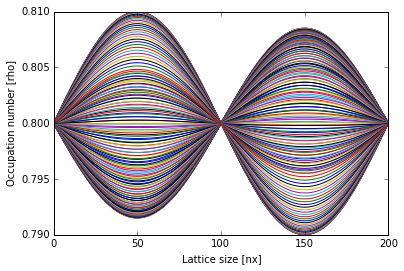

In [24]:
def set_rho(epsilon, rho0, rows, cols):
    
    rho = np.full((rows,cols), rho0, dtype = float)
    valx = (2 * np.pi * np.arange(cols)) / (cols)
    rho += epsilon * np.sin(valx).reshape(1, cols)
    return rho

#################
rows = 200
cols = 200
q = 9
timesteps = 300
mod = 2
savePlot = True

# shear wave rho decay init
epsilon = 0.01
rho0 = 0.8
assert(rho0 > epsilon), "rho0 must be bigger than the sine-offset"
rho = set_rho(epsilon, rho0, rows, cols)
u = np.zeros((rows, cols, 2))

omega = 0.3

# Belegung des lattice, dass das mit rho, welches ich in der funktion set_rho berechnet habe, passt
latt = calc_equilibrium(rho, u, c, w) # which is equal to f_eq

plt.figure()

for t in range(timesteps):
    if t%mod == 0:
        plt.plot(rho[rows//4,:]) 
    latt = shift_latt(latt)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += omega * (f_eq - latt)

plt.xlabel('Lattice size [nx]')
plt.ylabel('Occupation number [rho]')
if savePlot == True:
    plt.savefig('Report/Set_Rho_' + str(rows) + 'x' + str(cols) + '_omega=' + str(omega) + '_t=' + str(timesteps) + '_t_mod=' + str(mod) + '.pdf')

Omega= 1.7
Rows= 200
Cols= 200
Calculation of nu with noise= 0.02941
Calculation of nu1 with noise= 0.02941
Calculation of nu with noise at time point ( 50 ) =  0.03103
Calculation of nu with noise over all time points= 0.02957
Calculation of nu exact at time point ( 50 ) = 0.02941
Calculation of reynolds= 1019.91833


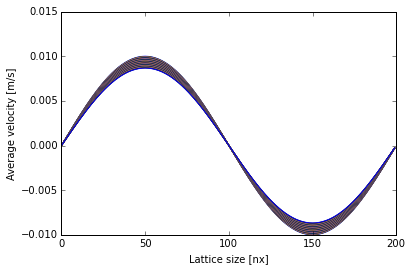

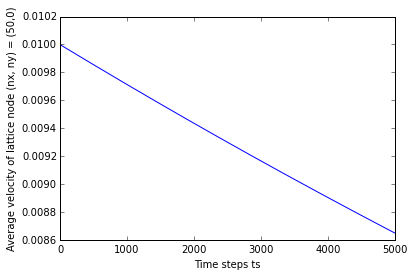

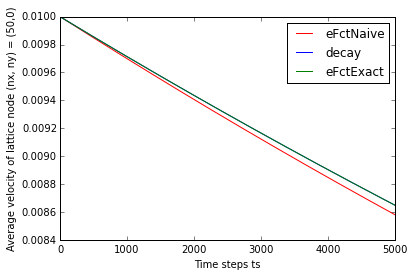

In [39]:
def set_u(epsilon, rows, cols):
    
    u = np.zeros((rows,cols, 2), dtype = float)
    valy = (2 * np.pi * np.arange(rows)) / (rows)
    u[:,:,1] = epsilon * np.sin(valy).reshape(rows, 1)
    return u

#################
rows = 200
cols = 200
q = 9
timesteps = 5000
mod = 100
savePlot = True
point = rows//4


# shear wave u decay init
epsilon = 0.01
rho = np.full((rows,cols), 1., dtype=float)
u = set_u(epsilon, rows, cols)

omega = 1.7

# Belegung des lattice, dass das mit u, welches ich in der funktion set_u berechnet habe, passt
latt = calc_equilibrium(rho, u, c, w) # which is equal to f_eq

# plot stuff
o = np.zeros((1,0), dtype=float);
plt.figure()

for t in range(timesteps):
    if t%mod == 0:
        plt.plot(u[:,0,1], label='{t}'.format(t=t))
    o = np.append(o, u[rows//4,0,1])
    latt = shift_latt(latt)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += omega * (f_eq - latt)

# Plot Stuff
t = np.arange(timesteps)
#t = np.arange(len(o)) # use this, if o = np.append() is in modulo loop

#plt.legend(loc='best')
plt.xlabel('Lattice size [nx]')
plt.ylabel('Average velocity [m/s]')

if savePlot == True:
     plt.savefig('Graphs/Set_U_Sine_' + str(rows) + 'x' + str(cols) + '_point=' + str(point) + '_omega=' + str(omega) + '_t=' + str(timesteps) + '_t_mod=' + str(mod) + '.pdf')

    
    
## Plot Decay Stuff    

plt.figure()
plt.plot(t, o, label="decay")
plt.xlabel('Time steps ts')
plt.ylabel('Average velocity of lattice node (nx, ny) = (50,0)')

if savePlot == True:
    plt.savefig('Report/Set_U_Decay_ohneFit_' + str(rows) + 'x' + str(cols) + '_point=' + str(point) + '_omega=' + str(omega) + '_t=' + str(timesteps) + '_t_mod=' + str(mod) + '.pdf')

# fittig stuff

plt.figure()
print("Omega=", omega)
print("Rows=", rows)
print("Cols=", cols)

nu_calc = 1 / 6 * (2 / omega - 1)
nu_calc1 = 1 / 3 * (1 /omega - 1/2)
print("Calculation of nu with noise= " '%.5f' % nu_calc)
print("Calculation of nu1 with noise= "'%.5f' % nu_calc1)

k = (2 * np.pi) / cols
nu_noise = (np.log(o[0]) - np.log(o[point]))  / (k** 2 * point)
print("Calculation of nu with noise at time point (",point,")", "= ",'%.5f' %  nu_noise)

nu_noise_all = (np.log(o[0]) - np.log(o[t[1::]]))  / (k** 2 * t[1::])
print("Calculation of nu with noise over all time points= " '%.5f' % np.mean(nu_noise_all))

eFuncFitNaive = o[0] * np.exp(-nu_noise * k**2 * t)
plt.plot(t, eFuncFitNaive, 'r', label="eFctNaive")

lnU = np.log(o)
t = np.arange(timesteps).reshape((-1,1))
phi = np.concatenate((t, np.ones((len(t), 1))), axis=1)

# Linear Least Squares
coefficient = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(lnU)

#print("Coefficients for linear log(u) fit = %s \n" % coefficient)
#line = coeffLn[0] * t + coeffLn[1]

A = np.exp(coefficient[1])
lambdaa = coefficient[0]

eFuncFitExact = A * np.exp(lambdaa * t)
plt.plot(t, o, label="decay")
plt.plot(t, eFuncFitExact, 'g', label="eFctExact")
plt.xlabel('Time steps ts')
plt.ylabel('Average velocity of lattice node (nx, ny) = (50,0)')

nuExact = (np.log(eFuncFitExact[0]) - np.log(eFuncFitExact[point]))  / ((k**2) * point)
print("Calculation of nu exact at time point (", point,")", "= " '%.5f' % nuExact)

re = (300 * 0.1) / nuExact
print("Calculation of reynolds= " '%.5f' % re)

plt.legend(loc='best')
if savePlot == True:
    plt.savefig('Report/Set_U_Decay_' + str(rows) + 'x' + str(cols) + '_point=' + str(point) + '_omega=' + str(omega) + '_t=' + str(timesteps) + '_t_mod=' + str(mod) + '.pdf', dpi=600)
    
    file = open('Report/Set_U_Decay_' + str(rows) + 'x' + str(cols) + '_point=' + str(point) + '_omega=' + str(omega) + '_t=' + str(timesteps) + '_t_mod=' + str(mod) + '.txt', "w")
    file.write("Rows: %s \n" % rows)
    file.write("Cols: %s \n" % cols)
    file.write("Omega: %s \n" % omega)
    file.write("Calculation of nu with noise: %s \n" % nu_calc)
    file.write("Calculation of nu1 with noise: %s \n" % nu_calc1)
    file.write("Calculation of nu with noise at time point ({}): {}\n".format(point, nu_noise))
    file.write("Calculation of nu with noise over all time points: %s\n" % np.mean(nu_noise_all))
    file.write("Calculation of nu exact at time point ({}): {}\n".format(point, nuExact[0]))
    file.write("Calculation of reynolds= " '%.5f' % re)
    file.close()

In [12]:
def mask_couette(grid):
    
    # mask top row
    mask[0,:,2] = True
    mask[0,:,5] = True
    mask[0,:,6] = True
    
    # mask bottom row
    mask[-1,:,4] = True
    mask[-1,:,7] = True
    mask[-1,:,8] = True
    
    return mask
    
latt[:,:,0] = 0
latt[:,:,1] = 0
latt[:,:,2] = 0
latt[:,:,3] = 0
latt[:,:,4] = 0
latt[:,:,5] = 0
latt[:,:,6] = 0
latt[:,:,7] = 0
latt[:,:,8] = 0

latt[0,:,6] = 0.5

saved_latt = np.zeros((latt.shape))
mask = np.zeros((latt.shape))

mask = mask_couette(latt)

doBounce = True

for t in range(timesteps):
    #print(latt[:,:,6])
    #print(latt[:,:,8])
    latt = shift_latt(latt)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    #f_eq = calc_equilibrium(rho, u, c, w)
    #latt += omega * (f_eq - latt)

/usr/lib/python3.3/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide


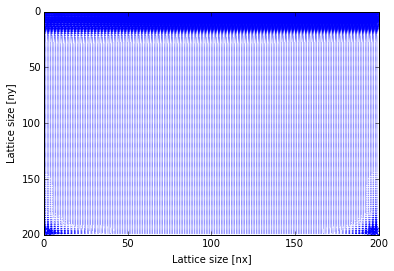

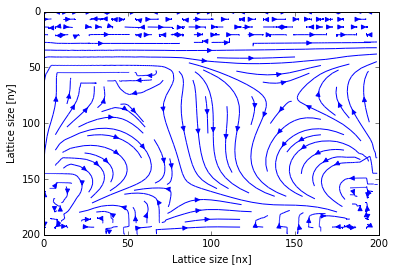

In [44]:
def addSlidingLidVelocity(grid, rho):
    f0 = grid[0,:,0]
    f1 = grid[0,:,1]
    f2 = grid[0,:,2]
    f3 = grid[0,:,3]
    f5 = grid[0,:,5]
    f6 = grid[0,:,6]
    
    rhoWall = f1 + f3 + f0 + 2 * (f6 + f2 + f5)
    vLid = 0.1
    
    ch = 7
    #grid[0,:,ch] -= 2 * w[ch] * rhoWall * (cu[0,:,ch] / cS**2)
    grid[0,:,ch] -= 6 * w[ch] * rhoWall * vLid
    
    ch = 8
    #grid[0,:,ch] -= 2 * w[ch] * rhoWall * (cu[0,:,ch] / cS**2)
    grid[0,:,ch] += 6 * w[ch] * rhoWall * vLid
    
    return grid
    
def mask_couette(grid):
    
    mask[0,:,2] = True
    mask[0,:,5] = True
    mask[0,:,6] = True
    
    mask[-1,:,4] = True
    mask[-1,:,7] = True
    mask[-1,:,8] = True
    
    return mask

#################
rows = 200
cols = 200
q = 9
timesteps = 5000
savePlot = True

latt = np.zeros((rows, cols, q))

doBounce = True
# create empty temporary lattice in which the old values (before shifiting) are stored
saved_latt = np.zeros((latt.shape))
# create empty mask lattice
mask = np.zeros((latt.shape))
# create mask for shift_latt function in order to know which channels have to be bounced back at which position
mask = mask_couette(latt)


rho = np.full(((latt.shape[0], latt.shape[1])), 1.0)
u = np.full((latt.shape[0], latt.shape[1], 2), 0.0)
latt = calc_equilibrium(rho, u, c, w)
omega = 1.7

for t in range(timesteps):
    latt = shift_latt(latt)
    latt = addSlidingLidVelocity(latt, rho)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += omega * (f_eq - latt)
    
    
x = np.arange(rows)
y = np.arange(cols)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.ylim(rows,0)
plt.quiver(Y, X, u[:,:,1].T, u[:,:,0].T, color='b')
plt.xlabel('Lattice size [nx]')
plt.ylabel('Lattice size [ny]')
if savePlot == True:
    plt.savefig("Report/Couette_Quiver_" + str(rows) + "x" + str(rows) + "_t=" + str(timesteps) + "_omega=" + str(omega) + ".pdf")

plt.figure()
plt.streamplot(X, Y, u[:,:,1], u[:,:,0], color='b')
plt.ylim(len(Y), 0)
plt.xlabel('Lattice size [nx]')
plt.ylabel('Lattice size [ny]')
if savePlot == True:
    plt.savefig("Report/Couette_Streamplot_" + str(rows) + "x" + str(rows) + "_t=" + str(timesteps) + "_omega=" + str(omega) + ".pdf")

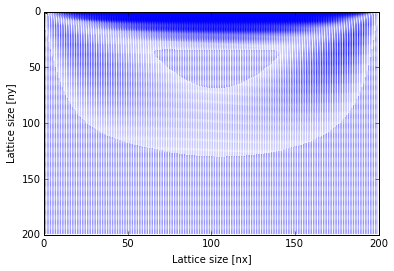

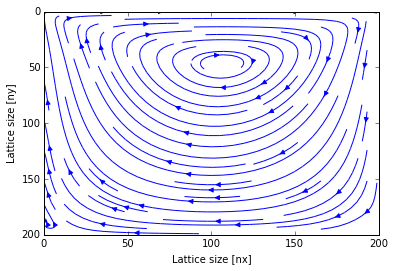

In [47]:
def addSlidingLidVelocity(grid, rho):
    rhoSlidingLid = rho[0,:]
    vLid = 0.1
    
    ch = 7
    #grid[0,:,ch] -= 2 * w[ch] * rhoWall * (cu[0,:,ch] / cS**2)
    grid[0,:,ch] -= 6 * w[ch] * rhoSlidingLid * (+vLid)
    
    ch = 8
    #grid[0,:,ch] -= 2 * w[ch] * rhoWall * (cu[0,:,ch] / cS**2)
    grid[0,:,ch] -= 6 * w[ch] * rhoSlidingLid * (-vLid)
    
    return grid
    
def mask_vortex(grid):
    
    # Top row
    mask[0,:,2] = True
    mask[0,:,5] = True
    mask[0,:,6] = True
    
    # Bottom row
    mask[-1,:,4] = True
    mask[-1,:,7] = True
    mask[-1,:,8] = True
    
    # Left column
    mask[:,0,3] = True
    mask[:,0,6] = True
    mask[:,0,7] = True
    
    # Right column
    mask[:,-1,1] = True
    mask[:,-1,5] = True
    mask[:,-1,8] = True
    
    return mask  

#################
rows = 200
cols = 200
q = 9
timesteps = 7500
savePlot = True

latt = np.zeros((rows, cols, q))


doBounce = True
# create empty temporary lattice in which the old values (before shifiting) are stored
saved_latt = np.zeros((latt.shape))
# create empty mask lattice
mask = np.zeros((latt.shape))
# create mask for shift_latt function in order to know which channels have to be bounced back at which position
mask = mask_vortex(latt)  


rho = np.full((latt.shape[0], latt.shape[1]), 1.0)
u = np.full((latt.shape[0], latt.shape[1], 2), 0.0)
latt = calc_equilibrium(rho, u, c, w)
omega = 0.3


for t in range(timesteps):
    latt = shift_latt(latt)
    latt = addSlidingLidVelocity(latt, rho)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += omega * (f_eq - latt)

x = np.arange(rows)
y = np.arange(cols)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.ylim(rows,0)
plt.xlabel('Lattice size [nx]')
plt.ylabel('Lattice size [ny]')
plt.quiver(Y, X, u[:,:,1].T, u[:,:,0].T, color='b')
if savePlot == True:
    plt.savefig("Report/Vortex_Quiver_" + str(rows) + "x" + str(rows) + "_t=" + str(timesteps) + "_omega=" + str(omega) + ".pdf")

plt.figure()
plt.streamplot(X, Y, u[:,:,1], u[:,:,0], color='b')
plt.ylim(len(Y), 0)
plt.xlabel('Lattice size [nx]')
plt.ylabel('Lattice size [ny]')
if savePlot == True:
    plt.savefig("Report/Vortex_Streamplot_" + str(rows) + "x" + str(rows) + "_t=" + str(timesteps) + "_omega=" + str(omega) + ".pdf")

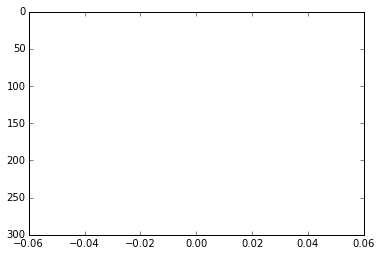

In [16]:
ux = np.load('ux_npy')
uy = np.load('uy_npy')

x = np.arange(ux.shape[0])
y = np.arange(uy.shape[0])
X, Y = np.meshgrid(x,y)

plt.figure()
plt.ylim(len(Y), 0)
plt.streamplot(X, Y, ux, uy, color='b')
#if savePlot == True:
    #plt.savefig("Vortex_Streamplot_" + str(x) + "_" + str(y) + "_" + str(timesteps) + ".pdf")